In [ ]:
#uncomment below to install stackAPI - python wrapper for StackExchange API
#pip install stackapi

In [64]:
from stackapi import StackAPI
from datetime import datetime, timedelta
import pandas as pd

In [65]:
SITE = StackAPI('stackoverflow')

In [180]:
delta = timedelta(days=365)
years = list(range(2008,2022))

In [165]:
years

[2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

In [181]:
print(start_date.strftime("%d %B, %Y")," to ", end_date.strftime("%d %B, %Y"))

01 January, 2021  to  01 January, 2022


In [182]:
#hardcode serachterm to "python" for now
searchterm = 'python'
view_count_yearly = []

In [184]:
start_date = datetime(year=2020, month=1, day =1)
end_date = start_date +delta
questions = SITE.fetch('questions', fromdate = start_date, todate = end_date, tagged= searchterm, sort='votes')

In [185]:
questions

{'backoff': 0,
 'has_more': True,
 'page': 5,
 'quota_max': 300,
 'quota_remaining': 33,
 'total': 0,
 'items': [{'tags': ['python', 'pandas', 'xlrd', 'pcf'],
   'owner': {'reputation': 2539,
    'user_id': 14808721,
    'user_type': 'registered',
    'profile_image': 'https://lh4.googleusercontent.com/-M5mYg2mtURw/AAAAAAAAAAI/AAAAAAAAAAA/AMZuuck8OiIkLBi6IBucITy4XIy72uK80A/s96-c/photo.jpg?sz=256',
    'display_name': 'Vignesh K',
    'link': 'https://stackoverflow.com/users/14808721/vignesh-k'},
   'is_answered': True,
   'view_count': 431549,
   'closed_date': 1608122436,
   'answer_count': 2,
   'score': 252,
   'last_activity_date': 1612795847,
   'creation_date': 1607702016,
   'last_edit_date': 1612795847,
   'question_id': 65254535,
   'link': 'https://stackoverflow.com/questions/65254535/xlrd-biffh-xlrderror-excel-xlsx-file-not-supported',
   'closed_reason': 'Duplicate',
   'title': 'xlrd.biffh.XLRDError: Excel xlsx file; not supported'},
  {'tags': ['python', 'machine-learning

In [166]:
for x in years:
    start_date = datetime(year=x, month=1, day=1)
    end_date = start_date + delta
    questions = SITE.fetch('questions', fromdate=start_date,todate=end_date, tagged= searchterm, sort='votes')
    total_views = 0
    for question in questions['items']:
        total_views += question["view_count"]
    view_count_yearly.append(total_views)

In [167]:
view_count_yearly

[187494639,
 314855291,
 272870288,
 244609718,
 246731839,
 224360344,
 143047622,
 113123930,
 88143984,
 71921439,
 45379497,
 26158807,
 16193677,
 6829967]

In [168]:
questions

{'backoff': 0,
 'has_more': True,
 'page': 5,
 'quota_max': 300,
 'quota_remaining': 38,
 'total': 0,
 'items': [{'tags': ['python',
    'pandas',
    'numpy',
    'scikit-learn',
    'python-3.7'],
   'owner': {'reputation': 1771,
    'user_id': 15150567,
    'user_type': 'registered',
    'profile_image': 'https://lh6.googleusercontent.com/-OWGodLwptYQ/AAAAAAAAAAI/AAAAAAAAA1o/AMZuucmZZ7jUgnhUF3BKhul3RbeBZAF1Bw/s96-c/photo.jpg?sz=256',
    'display_name': 'Sachit Jani',
    'link': 'https://stackoverflow.com/users/15150567/sachit-jani'},
   'is_answered': True,
   'view_count': 202286,
   'answer_count': 17,
   'score': 167,
   'last_activity_date': 1650878106,
   'creation_date': 1612516308,
   'last_edit_date': 1612517303,
   'question_id': 66060487,
   'content_license': 'CC BY-SA 4.0',
   'link': 'https://stackoverflow.com/questions/66060487/valueerror-numpy-ndarray-size-changed-may-indicate-binary-incompatibility-exp',
   'title': 'ValueError: numpy.ndarray size changed, may indi

In [152]:
len(questions['items'])

500

In [178]:
df = pd.DataFrame(data = {searchterm:view_count_yearly, "Year":years})
df.set_index("Year")
df

,python,Year
0,187494639,2008
1,314855291,2009
2,272870288,2010
3,244609718,2011
4,246731839,2012
5,224360344,2013
6,143047622,2014
7,113123930,2015
8,88143984,2016
9,71921439,2017


In [170]:
type(df)

pandas.core.frame.DataFrame

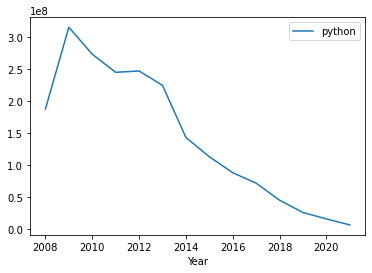

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
   
df.plot(x ='Year', y=searchterm, kind = 'line')
plt.show()